In [1]:
# import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data_set
data = pd.read_csv("Wage.csv")
data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


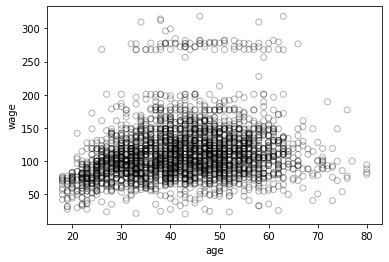

In [3]:
x = data['age']
y = data['wage']

# Visualize the relationship b/w age and wage
import matplotlib.pyplot as plt
plt.scatter(x, y, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

# 1. Polynomial Regression

In [4]:
reshaped_x = np.array(x).reshape(-1,1)
reshaped_x

array([[18],
       [24],
       [45],
       ...,
       [27],
       [27],
       [55]])

In [5]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
xp2 = polynomial_features.fit_transform(reshaped_x) # we need to first reshape the train_x data
print(xp2)

[[1.000e+00 1.800e+01 3.240e+02]
 [1.000e+00 2.400e+01 5.760e+02]
 [1.000e+00 4.500e+01 2.025e+03]
 ...
 [1.000e+00 2.700e+01 7.290e+02]
 [1.000e+00 2.700e+01 7.290e+02]
 [1.000e+00 5.500e+01 3.025e+03]]


In [6]:
model = sm.OLS(y, xp2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     134.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.82e-56
Time:                        17:15:35   Log-Likelihood:                -15321.
No. Observations:                3000   AIC:                         3.065e+04
Df Residuals:                    2997   BIC:                         3.067e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4252      8.190     -1.273      0.203     -26.483       5.633
x1             5.2940      0.389     13.620      0.000       4.532       6.056
x2            -0.0530      0.004    -11.960      0.000      -0.062      -0.044
==============================================================================
Omnibus:                     1092.673   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4915.802
Skew:                           1.715   Prob(JB):                         0.00
Kurtosis:                       8.250   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

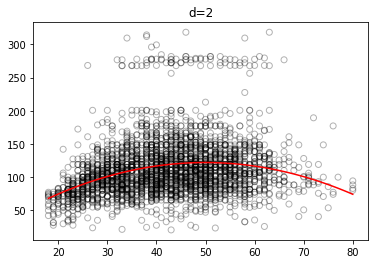

In [7]:
# make the plot
x_space = np.linspace(x.min(),x.max(),100)
xp_space = polynomial_features.transform(x_space.reshape(-1,1))
pred_plot = model.predict(xp_space)
plt.scatter(x, y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(x_space, pred_plot,'r-')
plt.title('d=2')
plt.show()

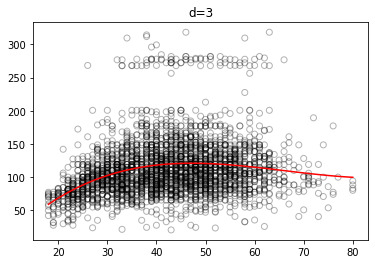

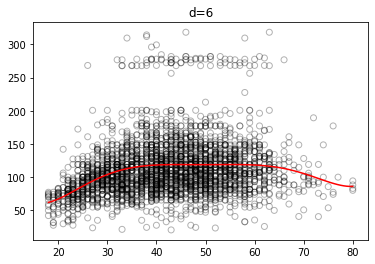

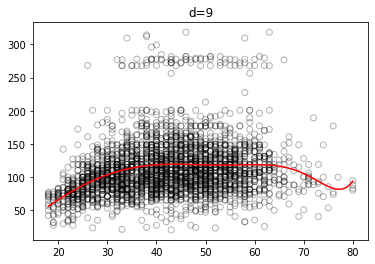

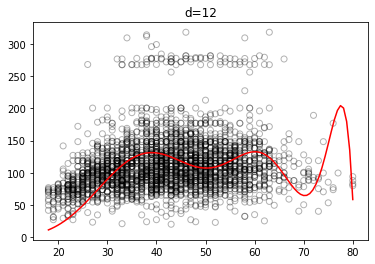

In [8]:
# Try different degrees
for d in [3,6,9,12]:
    polynomial_features= PolynomialFeatures(degree=d)
    xp = polynomial_features.fit_transform(np.array(x).reshape(-1,1)) # we need to first reshape the train_x data
    model = sm.OLS(y, xp).fit()
    
    # make the plot
    x_space = np.linspace(x.min(),x.max(),100)
    xp_space = polynomial_features.transform(x_space.reshape(-1,1))
    pred_plot = model.predict(xp_space)
    plt.scatter(x, y, facecolor='None', edgecolor='k', alpha=0.3)
    plt.plot(x_space, pred_plot,'r-')
    plt.title('d='+str(d))
    plt.show()

## We can use nested model ANOVA to make selection

In [9]:
xp1 = PolynomialFeatures(1).fit_transform(np.array(x).reshape(-1,1))
xp2 = PolynomialFeatures(2).fit_transform(np.array(x).reshape(-1,1))
xp3 = PolynomialFeatures(3).fit_transform(np.array(x).reshape(-1,1))
xp4 = PolynomialFeatures(4).fit_transform(np.array(x).reshape(-1,1))
xp5 = PolynomialFeatures(5).fit_transform(np.array(x).reshape(-1,1))

fit_1 = sm.OLS(y, xp1).fit()
fit_2 = sm.OLS(y, xp2).fit()
fit_3 = sm.OLS(y, xp3).fit()
fit_4 = sm.OLS(y, xp4).fit()
fit_5 = sm.OLS(y, xp5).fit()


print(sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1)) # typ=1 compare current to the previous
# We find the second model, df=2, is the best

   df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010101  143.593107  2.363850e-32
2    2996.0  4.777674e+06      1.0   15755.693660    9.888756  1.679202e-03
3    2995.0  4.771604e+06      1.0    6070.152118    3.809813  5.104620e-02
4    2994.0  4.770322e+06      1.0    1282.563016    0.804976  3.696820e-01


### A easier way of fitting polynomial regression

In [10]:
# Use np package Generating weights for polynomial function with degree =2
weights = np.polyfit(x, y, 2)
print(weights)

[ -0.05300507   5.29403003 -10.42522426]


# 2. Step Function

In [11]:
# Dividing the data into 4 bins
df_cut, bins = pd.cut(x, 4, retbins=True, right=True)
print(df_cut[:5])
print(bins)

0    (17.938, 33.5]
1    (17.938, 33.5]
2      (33.5, 49.0]
3      (33.5, 49.0]
4      (49.0, 64.5]
Name: age, dtype: category
Categories (4, interval[float64, right]): [(17.938, 33.5] < (33.5, 49.0] < (49.0, 64.5] < (64.5, 80.0]]
[17.938 33.5   49.    64.5   80.   ]


In [12]:
df_cut.value_counts(sort=False)

(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: age, dtype: int64

In [13]:
df_steps_dummies = pd.get_dummies(df_cut)
print(df_steps_dummies.head())

   (17.938, 33.5]  (33.5, 49.0]  (49.0, 64.5]  (64.5, 80.0]
0               1             0             0             0
1               1             0             0             0
2               0             1             0             0
3               0             1             0             0
4               0             0             1             0


In [14]:
# remember we need to drop 1 column for step function regression
df_steps_dummies = df_steps_dummies.drop(df_steps_dummies.columns[0], axis = 1)
print(df_steps_dummies.head())

   (33.5, 49.0]  (49.0, 64.5]  (64.5, 80.0]
0             0             0             0
1             0             0             0
2             1             0             0
3             1             0             0
4             0             1             0


In [15]:
model = sm.OLS(y, sm.add_constant(df_steps_dummies)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     66.58
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.13e-41
Time:                        17:15:36   Log-Likelihood:                -15353.
No. Observations:                3000   AIC:                         3.071e+04
Df Residuals:                    2996   BIC:                         3.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           94.1584      1.476     63.790      0.000      91.264      97.053
(33.5, 49.0]    24.0535      1.829     13.148      0.000      20.466      27.641
(49.0, 64.5]    23.6646      2.068     11.443      0.000      19.610      27.719
(64.5, 80.0]     7.6406      4.987      1.532      0.126      -2.139      17.420
==============================================================================
Omnibus:                     1062.354   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.200
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       8.011   Cond. No.                         7.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

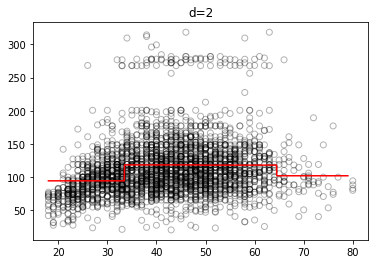

In [16]:
# make the plot
x_space = np.linspace(x.min(),x.max()-1,1000) 
bin_mapping = np.digitize(x_space, bins)  # use the same bins
x_space_dummy = pd.get_dummies(bin_mapping) 
x_space_dummy = x_space_dummy.drop(x_space_dummy.columns[0], axis = 1)

pred = model.predict(sm.add_constant(x_space_dummy))

plt.scatter(x, y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(x_space,pred,'r-')
plt.title('d=2')
plt.show()

## Other way using patsy

In [17]:
from patsy import dmatrix  # dmatrix means design matrix. We convert data to the designed basis fucntions in a matrix

In [18]:
step_x = dmatrix("bs(x, knots=(33.5,49,64.5), degree=0)", {"x": x}, return_type='dataframe')
model = sm.OLS(y, step_x).fit()
model.summary()
# Same as before

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     66.56
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.16e-41
Time:                        17:15:37   Log-Likelihood:                -15353.
No. Observations:                3000   AIC:                         3.071e+04
Df Residuals:                    2996   BIC:                         3.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     94.1584      1.476     63.789      0.000      91.264      97.053
bs(x, knots=(33.5, 49, 64.5), degree=0)[0]    23.9331      1.849     12.941      0.000      20.307      27.560
bs(x, knots=(33.5, 49, 64.5), degree=0)[1]    23.8857      2.019     11.833      0.000      19.928      27.844
bs(x, knots=(33.5, 49, 64.5), degree=0)[2]     7.6406      4.987      1.532      0.126      -2.139      17.420
==============================================================================
Omnibus:                     1062.290   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4549.991
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       8.010   Cond. No.                         7.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Piecewise Linear

In [19]:
pl_x = dmatrix("bs(x, knots=(33.5,49,64.5), degree=1)", {"x": x}, return_type='dataframe')
model = sm.OLS(y, pl_x).fit()
model.summary()
# Same as before

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     69.76
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.51e-56
Time:                        17:15:37   Log-Likelihood:                -15316.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     62.2539      3.439     18.100      0.000      55.510      68.998
bs(x, knots=(33.5, 49, 64.5), degree=1)[0]    52.3829      4.337     12.078      0.000      43.879      60.887
bs(x, knots=(33.5, 49, 64.5), degree=1)[1]    57.1568      3.590     15.923      0.000      50.118      64.195
bs(x, knots=(33.5, 49, 64.5), degree=1)[2]    55.3430      4.653     11.893      0.000      46.219      64.467
bs(x, knots=(33.5, 49, 64.5), degree=1)[3]    18.1038     11.576      1.564      0.118      -4.593      40.801
==============================================================================
Omnibus:                     1090.662   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4883.707
Skew:                           1.713   Prob(JB):                         0.00
Kurtosis:                       8.228   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

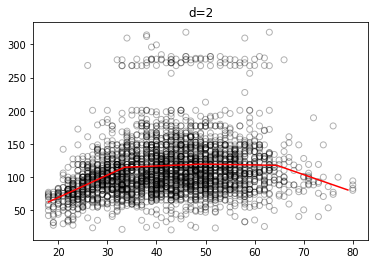

In [20]:
# make the plot
x_space = np.linspace(x.min(),x.max()-1,1000)
pl_x_space = dmatrix("bs(x, knots=(33.5,49,64.5), degree=1)", {"x": x_space}, return_type='dataframe')
pred = model.predict(pl_x_space)

plt.scatter(x, y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(x_space,pred,'r-')
plt.title('d=2')
plt.show()

# 4. Regression Spline

https://patsy.readthedocs.io/en/latest/API-reference.html#spline-regression

In [21]:
# Generating cubic spline with 3 knots at 25, 40 and 60
# bs means b-spline
transformed_x1 = dmatrix("bs(x, knots=(25,40,60), degree=3)", {"x": x}, return_type='dataframe')
# Fitting Generalised linear model on transformed dataset
model_1 = sm.OLS(y, transformed_x1).fit()

In [22]:
# Generating cubic spline with 4 knots
transformed_x2 = dmatrix("bs(x, knots=(25,40,50,65),degree =3)", {"x": x}, return_type='dataframe')
# Fitting Generalised linear model on transformed dataset
model_2 = sm.OLS(y, transformed_x2).fit()

In [23]:
# Just view each column has a basis function
transformed_x1.head()

,Intercept,"bs(x, knots=(25, 40, 60), degree=3)[0]","bs(x, knots=(25, 40, 60), degree=3)[1]","bs(x, knots=(25, 40, 60), degree=3)[2]","bs(x, knots=(25, 40, 60), degree=3)[3]","bs(x, knots=(25, 40, 60), degree=3)[4]","bs(x, knots=(25, 40, 60), degree=3)[5]"
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1.0,0.559911,0.403778,0.033395,0.000000,0.000000,0.0
2,1.0,0.000000,0.114796,0.618564,0.262733,0.003906,0.0
3,1.0,0.000000,0.167109,0.633167,0.198880,0.000844,0.0
4,1.0,0.000000,0.034014,0.508194,0.426542,0.031250,0.0


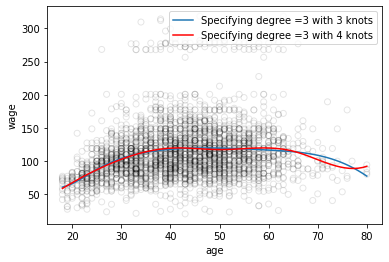

In [24]:
# We will plot the graph for 70 observations only
x_space = np.linspace(x.min(),x.max(),70)

# Make some predictions
pred1 = model_1.predict(dmatrix("bs(x, knots=(25,40,60))", {"x": x_space}, return_type='dataframe'))
pred2 = model_2.predict(dmatrix("bs(x, knots=(25,40,50,65),degree =3)", {"x": x_space}, return_type='dataframe'))

# Plot the splines and error bands
plt.scatter(x,y, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(x_space, pred1, label='Specifying degree =3 with 3 knots')
plt.plot(x_space, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

# 5. Natural Spline

https://patsy.readthedocs.io/en/latest/API-reference.html#spline-regression

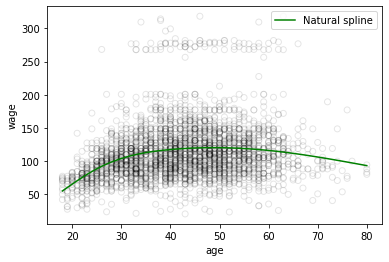

In [25]:
# Generating natural cubic spline
# cr is natural cubic spline 
transformed_x3 = dmatrix("cr(x,knots=(25,40,60))", {"x": x}, return_type='dataframe')
model_3 = sm.OLS(y, transformed_x3).fit()

# We will plot the graph for 70 observations only
x_space = np.linspace(x.min(),x.max(),70)
pred_space = model_3.predict(dmatrix("cr(x, knots=(25,40,60))", {"x": x_space}, return_type='dataframe'))

# Plot the spline
plt.scatter(x,y, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(x_space, pred_space,color='g', label='Natural spline')
plt.legend()
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

# 6. Local Regression

In [26]:
pred_1 = sm.nonparametric.lowess(y, x, frac=1./5) # first column is the sorted x and the second column is the sorted y
pred_2 = sm.nonparametric.lowess(y, x, frac=1./2)
pred_3 = sm.nonparametric.lowess(y, x, frac=1./1)

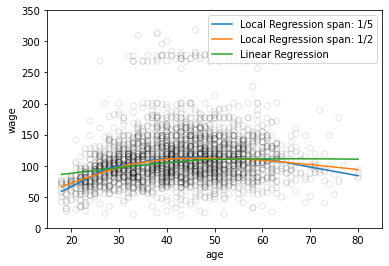

In [27]:
# Plot the spline
plt.scatter(x,y, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(pred_1[:,0], pred_1[:,1], label='Local Regression span: 1/5')
plt.plot(pred_2[:,0], pred_2[:,1], label='Local Regression span: 1/2')
plt.plot(pred_3[:,0], pred_3[:,1], label='Linear Regression')

plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

In [28]:
# Make the prediction for new points
from scipy.interpolate import interp1d
f = interp1d(pred_1[:,0], pred_1[:,1], bounds_error=False) #bounds_error=False do not report error when out of bound
x_new = 50.5
y_new = f(x_new)
print(y_new)

110.25944514326966
